In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"Diwali Sales Data.csv",encoding = "unicode_escape")
df = pd.DataFrame(data)
print(df)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(["Status","unnamed1"],axis = 1,inplace =True)

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df["Amount"] = df["Amount"].astype("int")

In [10]:
df["Amount"].dtypes

dtype('int32')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


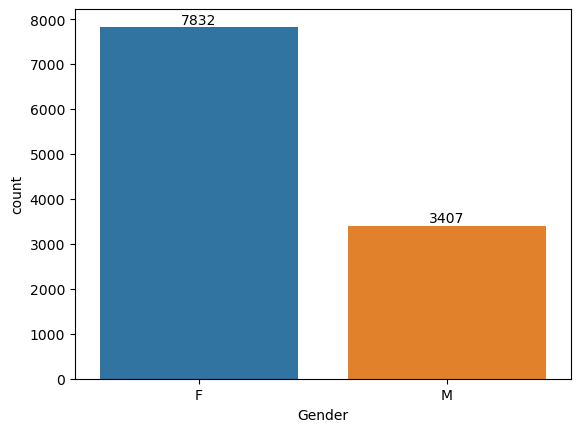

In [13]:
ax = sns.countplot(data = df,x = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)


In [23]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
print(sales_gen)

  Gender    Amount
0      F  74335853
1      M  31913276


<Axes: xlabel='Gender', ylabel='Amount'>

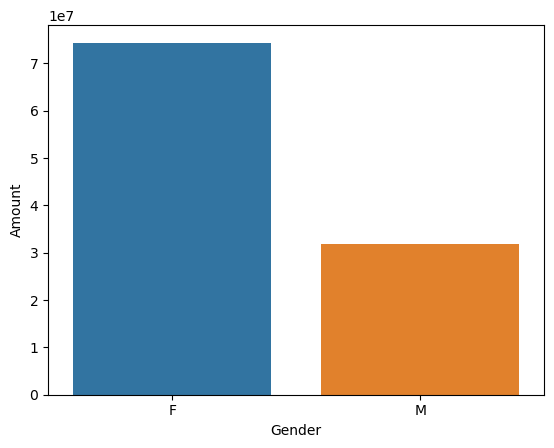

In [22]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

In [31]:
#From above graphs we can see that most of the buyers are females and the purchasing amount of females is also greater than men

In [26]:
#AGE

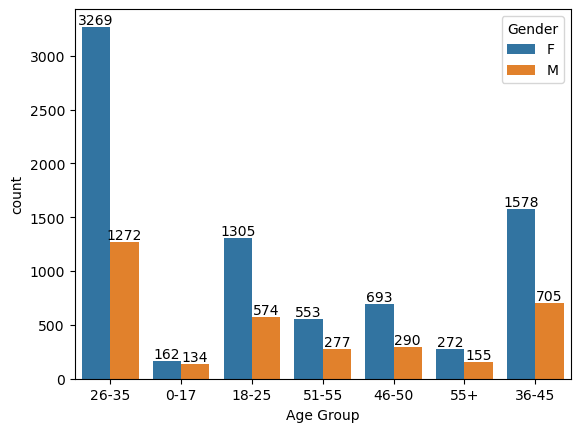

In [30]:
ax = sns.countplot(data = df, x = "Age Group",hue = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)

In [33]:
#Total amount spent age group wise

<Axes: xlabel='Age Group', ylabel='Amount'>

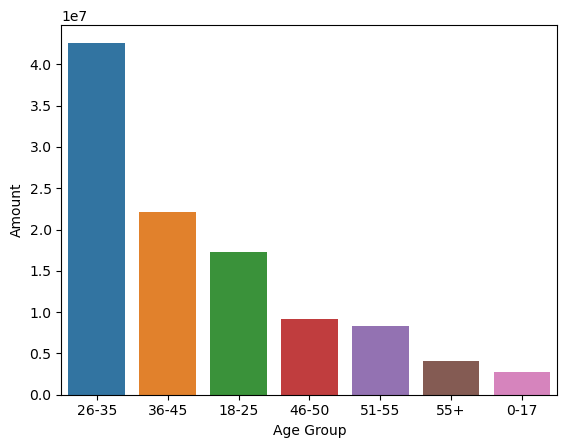

In [35]:
sales_age = df.groupby(["Age Group"],as_index = False)["Amount"].sum().sort_values(by="Amount",ascending = False)
sns.barplot(data = sales_age , x = "Age Group",y = "Amount")

In [36]:
#From the above graphs we can tell that most of the buyers are from the 26-35 yrs female age group

In [37]:
#Total no of orders from top 10 States

<Axes: xlabel='State', ylabel='Orders'>

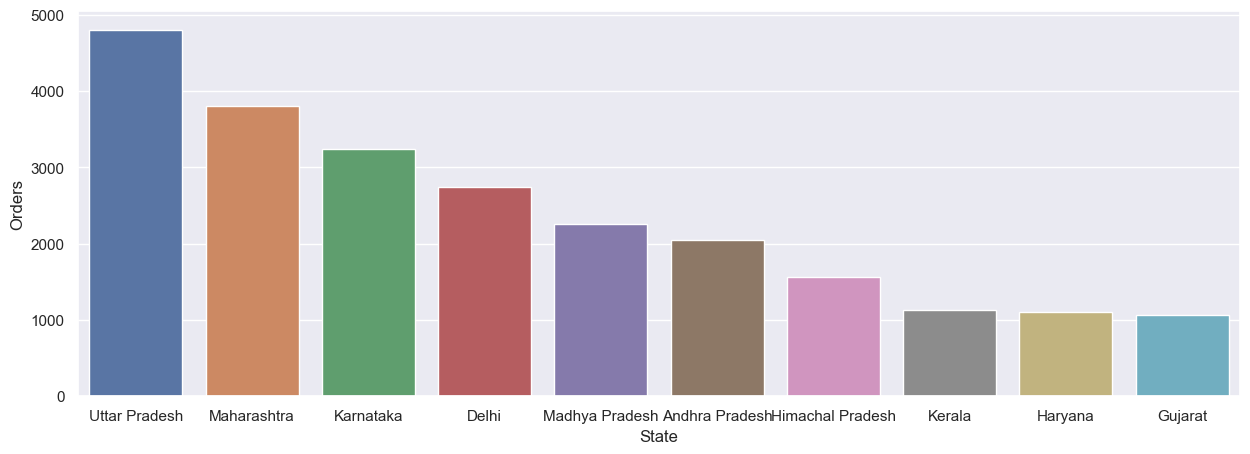

In [40]:
sales_state = df.groupby(["State"],as_index = False)["Orders"].sum().sort_values(by = "Orders",ascending=False).head(10)
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(data = sales_state,x = "State", y = "Orders")

In [41]:
#Total amount/sales per top 10 states

<Axes: xlabel='State', ylabel='Amount'>

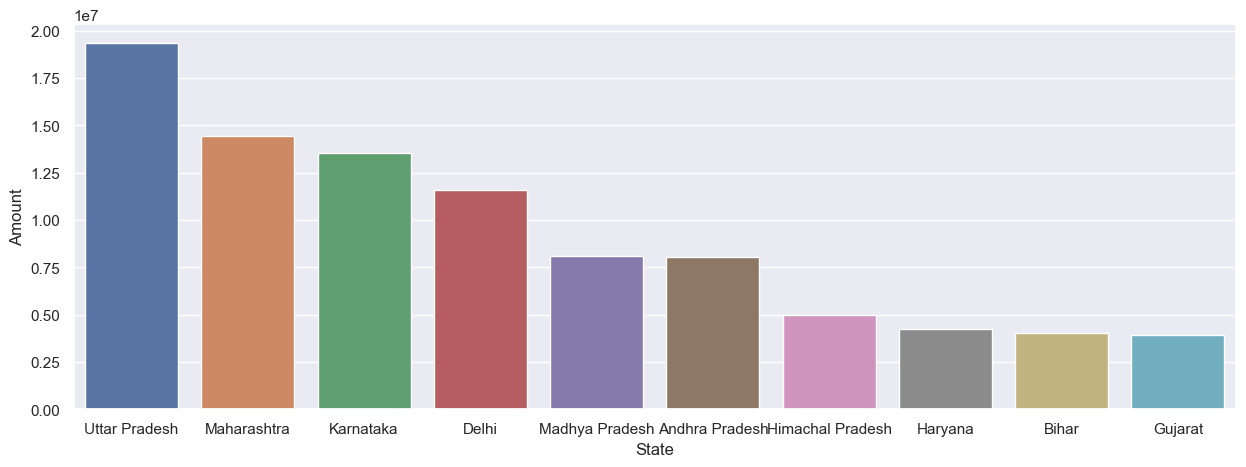

In [45]:
sales_state = df.groupby(["State"],as_index =False)["Amount"].sum().sort_values(by = "Amount",ascending = False).head(10)
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(data = sales_state, x = "State", y = "Amount")

In [46]:
#From the above graphs we can tell that most of the orders and total sales/amount are from UP , Maharashtra and Karnataka respt

In [47]:
#Occupation

In [ ]:
#Count of Orders as per occupation

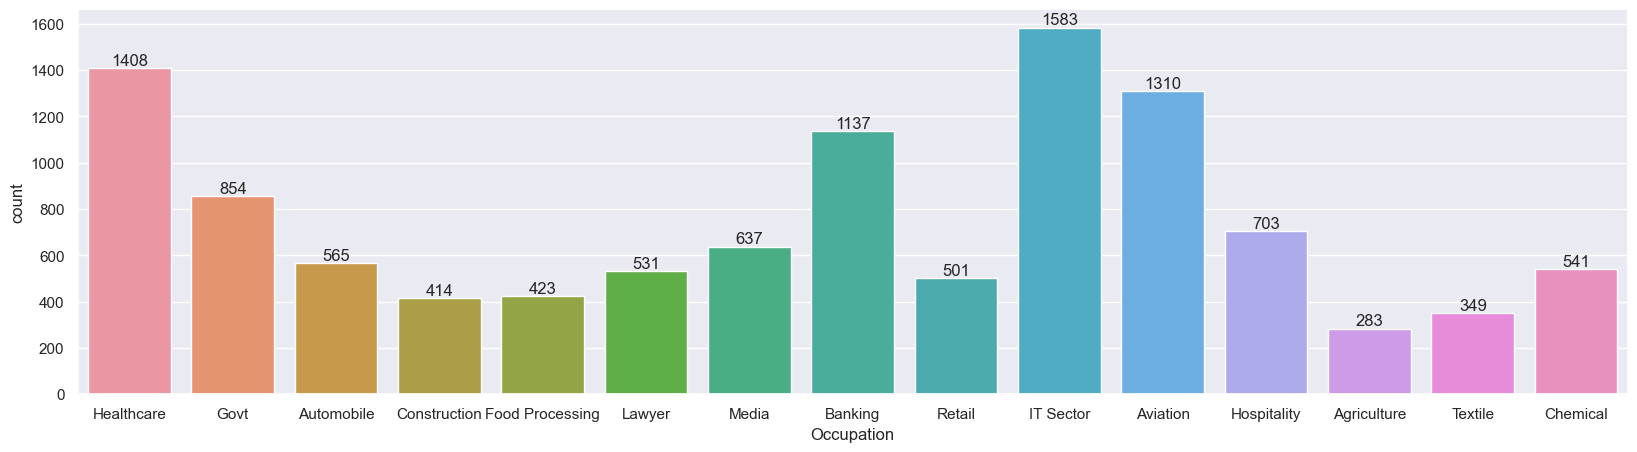

In [53]:
ax= sns.countplot(data = df, x = "Occupation")
sns.set(rc={"figure.figsize":(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [54]:
#Total amount/occupation 

<Axes: xlabel='Occupation', ylabel='Amount'>

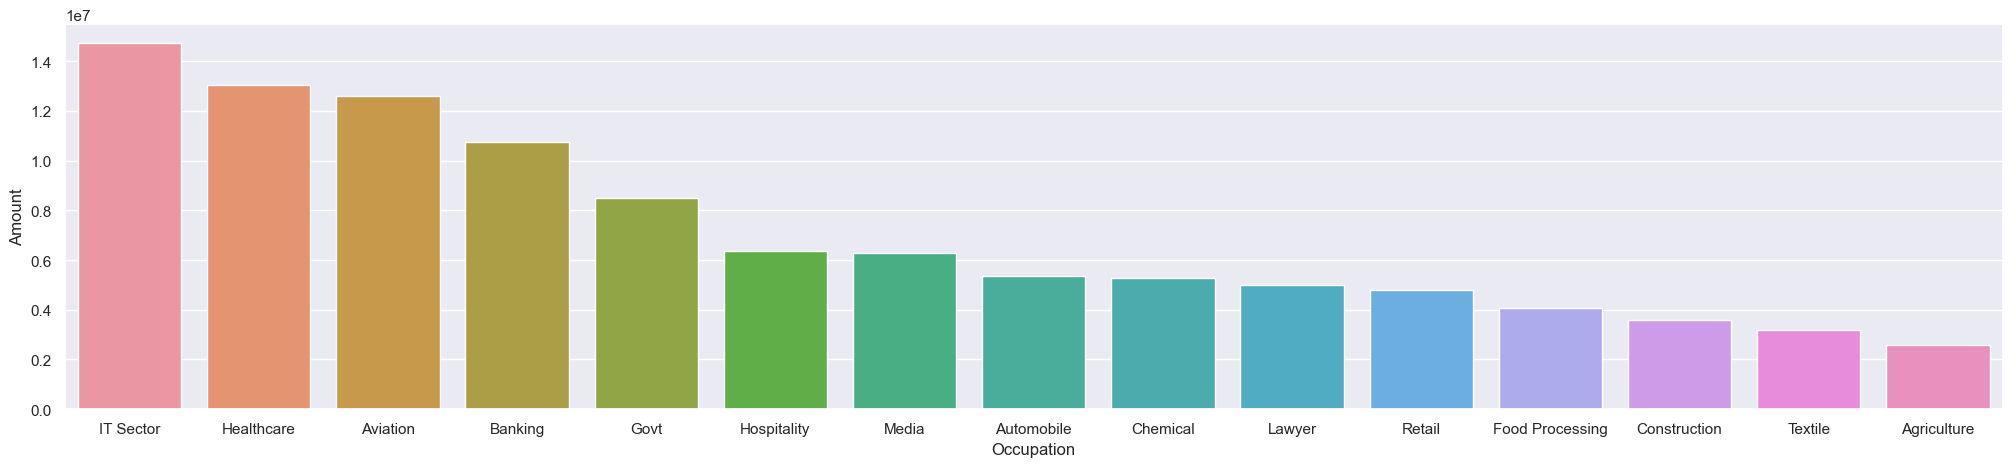

In [56]:
sales_ocp = df.groupby(["Occupation"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sns.barplot(data = sales_ocp, x= "Occupation", y = "Amount")

In [57]:
#From the above graphs we can tell that most of the buyers are working in IT, Health and Aviation sector

In [3]:
#Product category

In [4]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

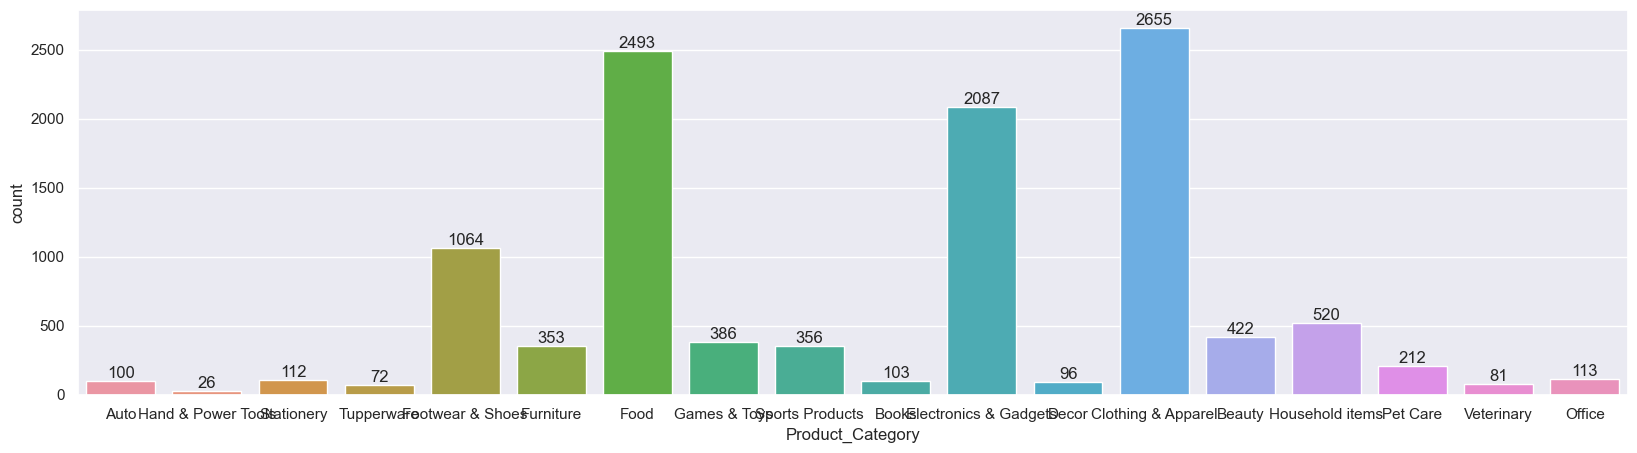

In [8]:
ax = sns.countplot(x = "Product_Category",data = df)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={"figure.figsize":(25,5)})

<Axes: xlabel='Product_Category', ylabel='Amount'>

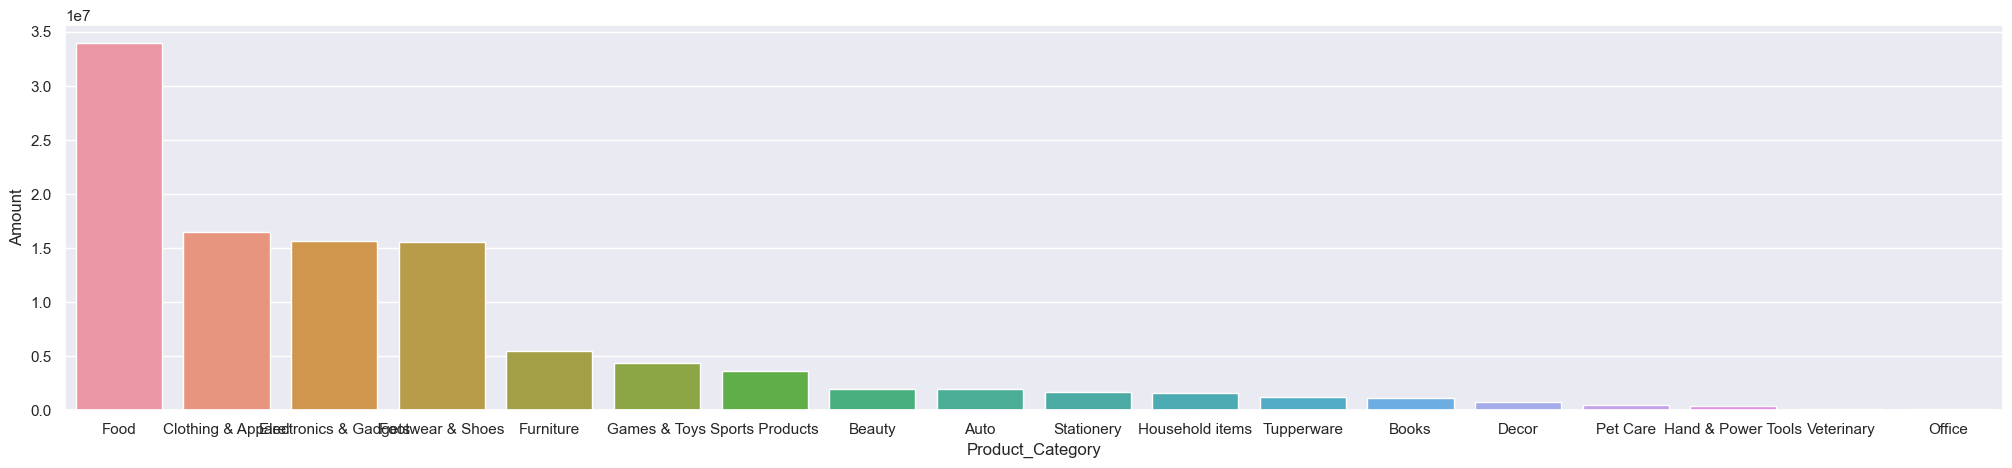

In [9]:
sales_prod = df.groupby(["Product_Category"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sns.barplot(data = sales_prod,x = "Product_Category",y = "Amount")

In [10]:
#From the above graphs we can see that most of the sold products are from food, clothing and electronics category

<Axes: xlabel='Product_ID', ylabel='Amount'>

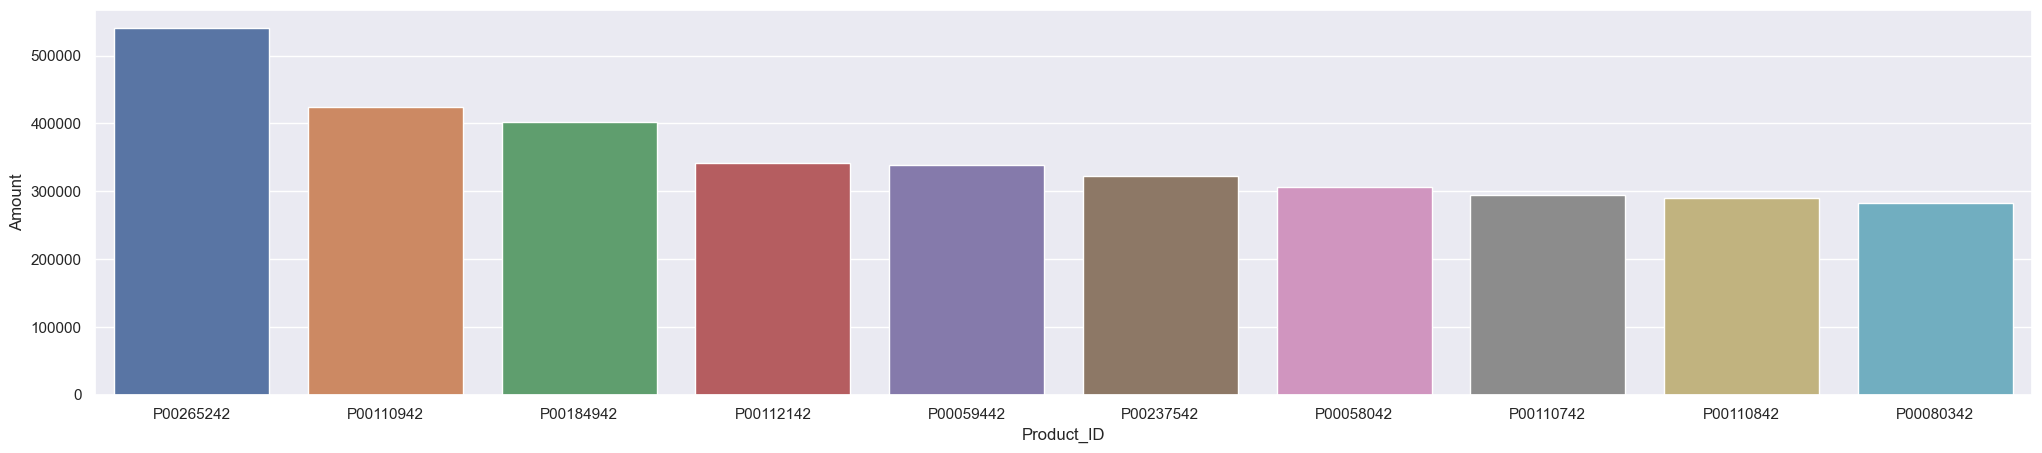

In [11]:
sales_id = df.groupby(["Product_ID"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False).head(10)
sns.barplot(data = sales_id, x= "Product_ID",y = "Amount")

In [12]:
#Conclusion

In [15]:
#Married women age group 26-35 yrs from Maharashtra, UP and Karnataka working in IT, Healthcare and Aviation sector are most likely to buy products from 
#Food, Clothing and Electronics Category

In [ ]:
#THANK YOU